## Introduction
***

![netflix_stock.jpg](attachment:netflix_stock.jpg)

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data.

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

After you complete your visualizations, you'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team. Your slides should include:

- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Import Libraries

Let's get our notebook ready for visualizing! Import the libraries that you'll be using in this project:
- matplotlib
- pandas
- numpy
- seaborn

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Inspect the Data

The data you will use for creating your visualizations come from the following datasets:

 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

Let's load the datasets and inspect them.

While inspecting the variables, ask yourself questions about the data such as:

- Is the data represented by days, weeks, or months?
- In which ways are the files different?
- What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [ ]:
# Load datasets
netflix_data = pd.read_csv('NFLX.csv')
netflix_daily_data = pd.read_csv('NFLX_daily_by_quarter.csv')
dji_data = pd.read_csv('DJI.csv')

# Inspect datasets
print(netflix_data.head())
print(netflix_daily_data.head())
print(dji_data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  
         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997 

## Rename Adj close

Notice how The first two column names are one word each, and the only one that is not is `Adj Close`!

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Change the name of the `Adj Close` column to `Price` all of the dataframes.

In [ ]:
# Rename 'Adj Close' to 'Price'
netflix_data.rename(columns = {'Adj Close':'Price'}, inplace=True)
netflix_daily_data.rename(columns={'Adj Close': 'Price'}, inplace=True)
dji_data.rename(columns={'Adj Close': 'Price'}, inplace=True)

print(netflix_data.head())
print(netflix_daily_data.head())
print(dji_data.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  
         Date        Open        High         Low       Close       Price  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997 

## Visualize Quarterly Data

Now its time to visualize the Netflix quarterly data!

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. Accomplish this using a violin plot with four violins, one for each business quarter!

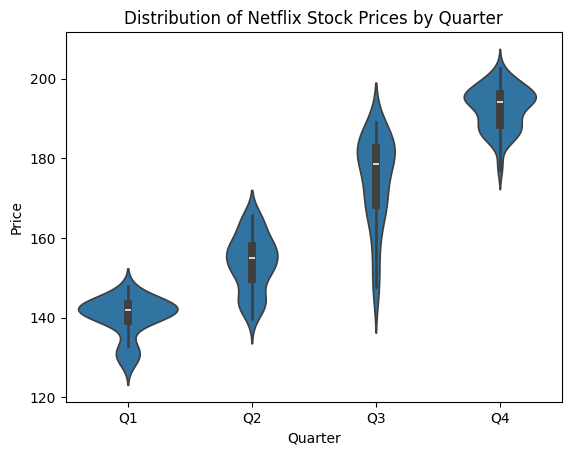

In [ ]:
# Create a violin plot for stock prices by quarter
sns.violinplot(x='Quarter', y='Price', data=netflix_daily_data)
plt.title('Distribution of Netflix Stock Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.show()


- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices?

## Measure Performance of Earnings per Share

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter plot.

Use the following lists to create the scatter plot:

In [ ]:
# Set distinct values to seperate quarters
x_positions = [1, 2, 3, 4]

# Label each of the quarters
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]

# Actual earnings per share
earnings_actual =[.4, .15, .29, .41]

# Estimated projected earnings per share
earnings_estimate = [.37, .15, .32, .41]

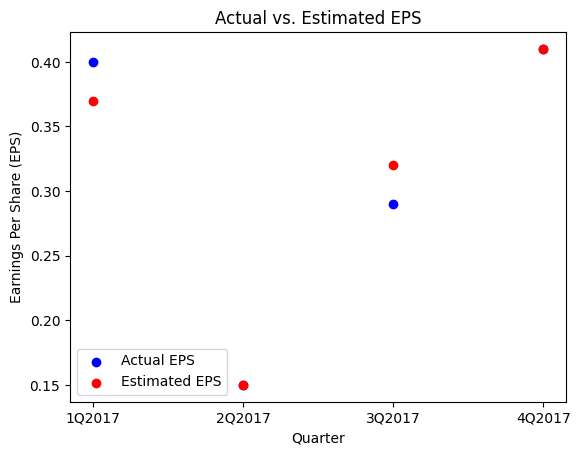

In [ ]:


# Scatter plot
plt.scatter(x_positions, earnings_actual, color='blue', label='Actual EPS')
plt.scatter(x_positions, earnings_estimate, color='red', label='Estimated EPS')
plt.xticks(x_positions, ['1Q2017', '2Q2017', '3Q2017', '4Q2017'])
plt.title('Actual vs. Estimated EPS')
plt.xlabel('Quarter')
plt.ylabel('Earnings Per Share (EPS)')
plt.legend()
plt.show()





## Visualize Earnings and Revenue Side by Side

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

In [ ]:
# Data for earnings and revenue
quarters = ['1Q2017', '2Q2017', '3Q2017', '4Q2017']
earnings = [0.066, 0.129, 0.185, 0.290]
revenue = [2.64, 2.79, 2.98, 3.29]




What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

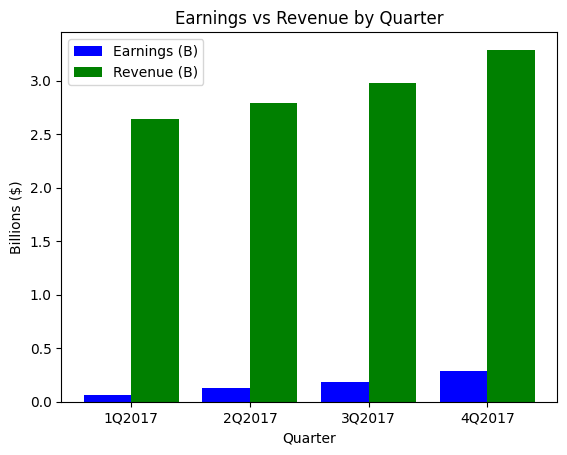

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create side-by-side bar chart
x = np.arange(len(quarters))

plt.bar(x - 0.2, earnings, 0.4, label='Earnings (B)', color='blue')
plt.bar(x + 0.2, revenue, 0.4, label='Revenue (B)', color='green')
plt.xticks(x, quarters)
plt.title('Earnings vs Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Billions ($)')
plt.legend()
plt.show()
plt.savefig('earnings_vs_revenue.png')

## Comparing to the Dow Jones Industrial Average


In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure.

Consider the following questions when analyzing the plots:

- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
- Which was more volatile?
- How do the prices of the stocks compare?

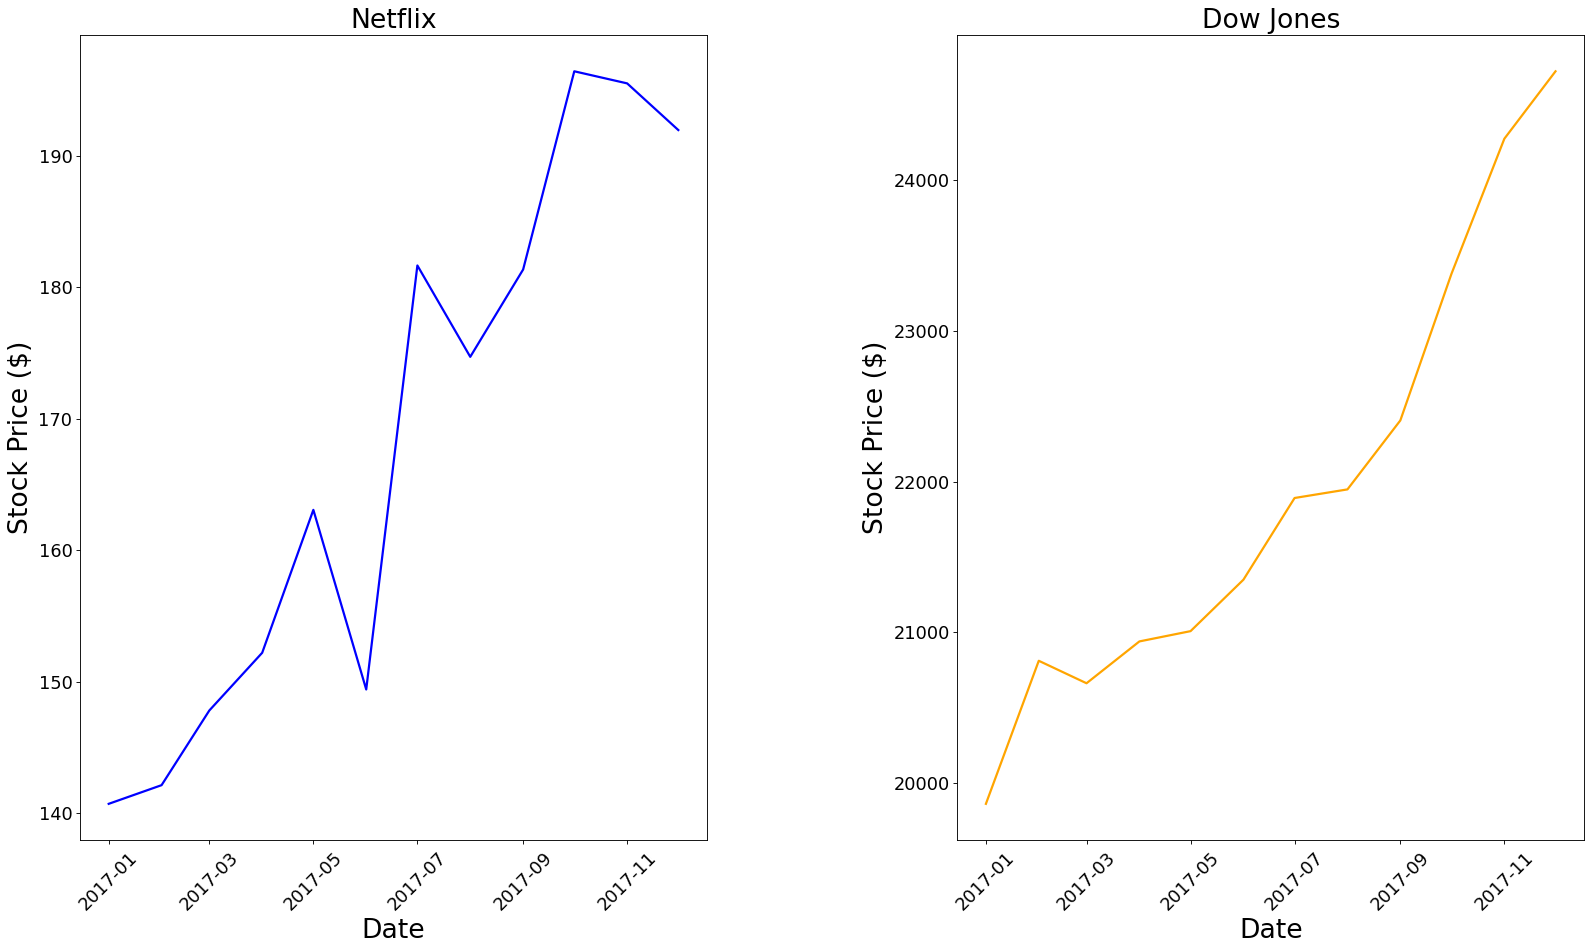

In [ ]:
# Convert 'Date' columns to datetime format
netflix_data['Date'] = pd.to_datetime(netflix_data['Date'])
dji_data['Date'] = pd.to_datetime(dji_data['Date'])

# Create a figure
plt.figure(figsize=(20, 12), dpi=80)

# Netflix Plot
plt.subplot(1, 2, 1)
plt.plot(netflix_data['Date'], netflix_data['Price'], color='blue', linewidth=2)
plt.title("Netflix", fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.ylabel("Stock Price ($)", fontsize=24)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# Dow Jones Plot
plt.subplot(1, 2, 2)
plt.plot(dji_data['Date'], dji_data['Price'], color='orange', linewidth=2)
plt.title("Dow Jones", fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.ylabel("Stock Price ($)", fontsize=24)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()


## Challenge

Congratulations

Your seaborn visualization skills added great value to the team! The team found so much insight from the work, they asked you to present your findings to the board. The extra task of creating a presentation can be considered as a challenge which does not need to be completed to move on to the next section.

It's time to make your presentation! Save each of your visualizations as a png file with `plt.savefig("filename.png")`.

As you prepare your slides, think about the answers to the graph literacy questions. Embed your observations in the narrative of your slideshow!

Remember that your slideshow must include:
- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

